In [1]:
import pandas as pd
import numpy as np
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
import seaborn as sns

from inline_sql import sql, sql_val

In [2]:
df_titanic = pd.read_csv("titanic_training.csv")

In [3]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
consultaSQL = """
               SELECT Sex, COUNT(Survived) AS Survivors
               FROM df_titanic
               GROUP BY Sex
              """

dataframeResultado = sql^ consultaSQL
dataframeResultado

,Sex,Survivors
0,male,577
1,female,314


In [5]:
df_titanic[df_titanic['Sex'] == 'female']['Age'].describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

<Axes: >

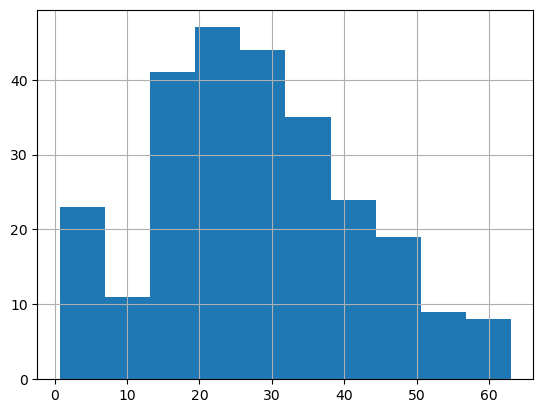

In [6]:
df_titanic[df_titanic['Sex'] == 'female']['Age'].hist()

In [7]:
df_titanic[df_titanic['Sex'] == 'male']['Age'].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

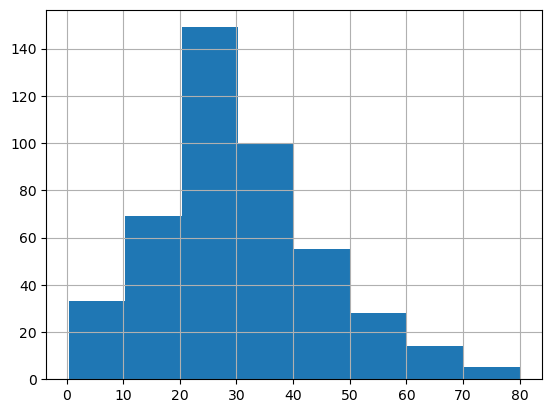

In [8]:
df_titanic[df_titanic['Sex'] == 'male']['Age'].hist(bins = 8)

In [9]:
# ¿Cuantos pasajeros de primera clase había? ¿Y de segunda y tercera?

df_survivors = df_titanic[df_titanic['Survived'] == 1]
df_women_survivors = df_titanic[(df_titanic['Survived'] == 1) & (df_titanic['Sex'] == 'female')]

#df_survivors[df_survivors['Pclass'] == 1].size / df_survivors.size
df_women_survivors[df_women_survivors['Pclass'] == 1].size / df_women_survivors.size

0.3905579399141631

---------------------------------------------

In [10]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_iris
from sklearn import tree

[Text(0.5, 0.9, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.7, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8, 'True  '),
 Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8, '  False'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.3, 'x[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.1, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.8461538461

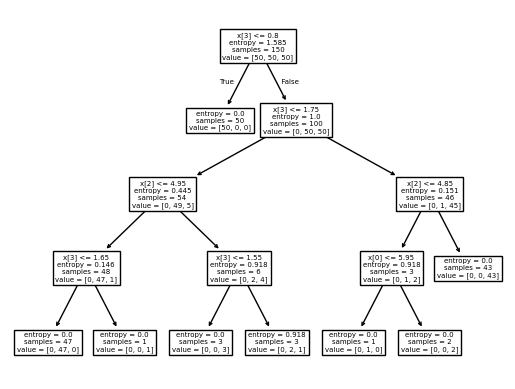

In [15]:
iris = load_iris()
X, y = iris.data, iris.target # X es dataframe y

arbol = DecisionTreeClassifier(criterion='entropy', max_depth=2)


clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(X, y)

tree.plot_tree(clf)

#arbol.fit(X, y) # Entrenamiento del modelo
#prediction = arbol.predict(X) # Generamos las predicciones // llamamos al modelo

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Los arboles elijen los niveles/nodos momento a momento lo mejor que puede; lo que es distinto a pensar de antemano "tenés 3 preguntas para hacer"
O sea, es goloso


Cuando las clases están muy desbalanceadas, la exactitud no es una buena métrica porque pierdo esas clases minoritarias de vista
